**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Myntra Fashion Clothing.csv')

In [ ]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [ ]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    139619
OriginalPrice (in Rs)         0
DiscountOffer             57579
SizeOption                    0
Ratings                  282613
Reviews                  282613
dtype: int64

**Filling the missing value and drop columns**

In [ ]:
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())
df['DiscountOffer'] = df['Reviews'].fillna(df['Reviews'].mean())
df.drop('DiscountPrice (in Rs)', axis = 1 , inplace = True)

In [ ]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'OriginalPrice (in Rs)',
       'DiscountOffer', 'SizeOption', 'Ratings', 'Reviews'],
      dtype='object')

In [ ]:
df['BrandName'].value_counts()

Pothys                           16005
Roadster                         10417
KALINI                            9566
HERE&NOW                          6515
HRX by Hrithik Roshan             5261
                                 ...  
Alsace Lorraine Paris                1
Saart Bunaai                         1
Zelocity                             1
Killer                               1
Powerpuff Girls by Dressberry        1
Name: BrandName, Length: 2032, dtype: int64

In [ ]:
df['Category'].value_counts()

Indian Wear                 145845
Western                      87453
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: Category, dtype: int64

In [ ]:
df['category_by_Gender'].value_counts()

Women    285646
Men      187379
Name: category_by_Gender, dtype: int64

In [ ]:
df['DiscountOffer'].value_counts()

61.99082     282613
5.00000       12173
6.00000        9876
7.00000        8326
8.00000        7346
              ...  
960.00000         1
992.00000         1
994.00000         1
821.00000         1
997.00000         1
Name: DiscountOffer, Length: 1001, dtype: int64

<Axes: >

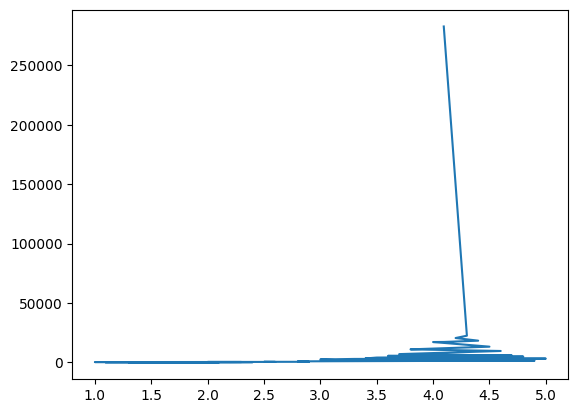

In [ ]:
df['Ratings'].value_counts().plot()

<Axes: >

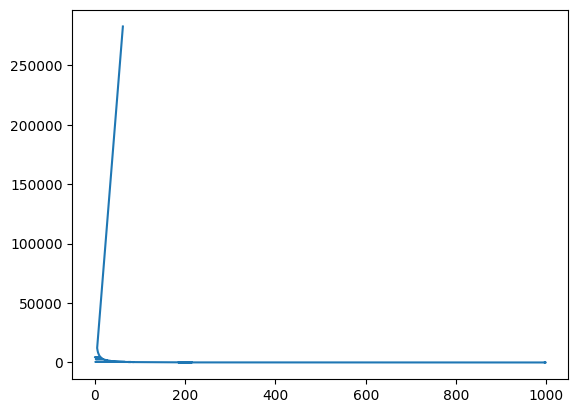

In [ ]:
df['Reviews'].value_counts().plot()

<Axes: ylabel='None'>

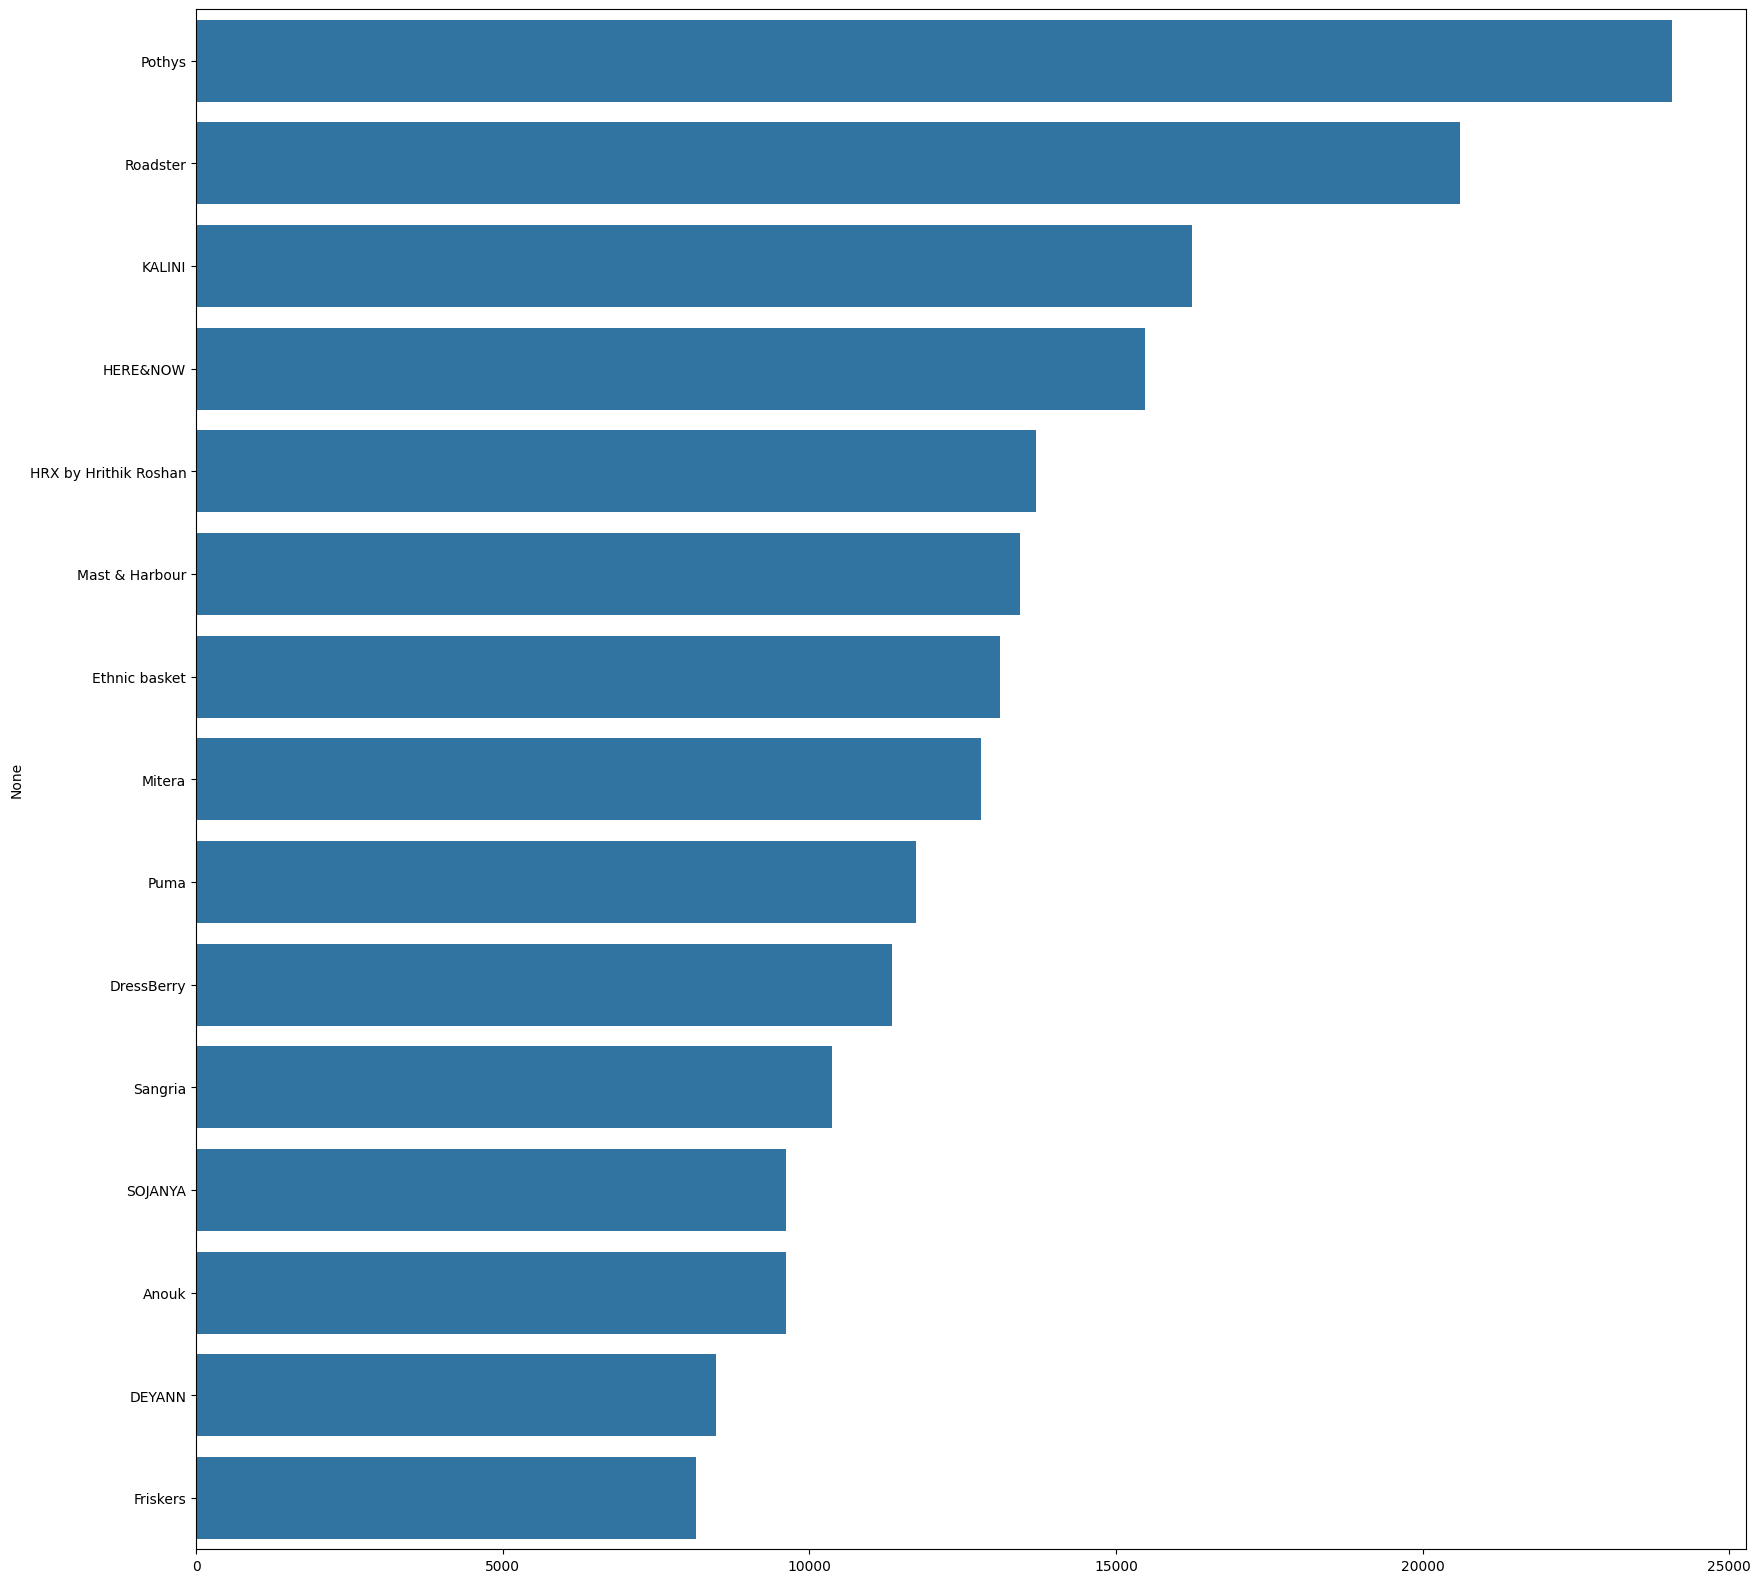

In [ ]:
# Top 10 Brand based on price
plt.figure(figsize = (20,20))
sns.barplot(x = df['OriginalPrice (in Rs)'].value_counts().head(15).values, y=df['BrandName'].value_counts().head(15).index)

<Axes: ylabel='None'>

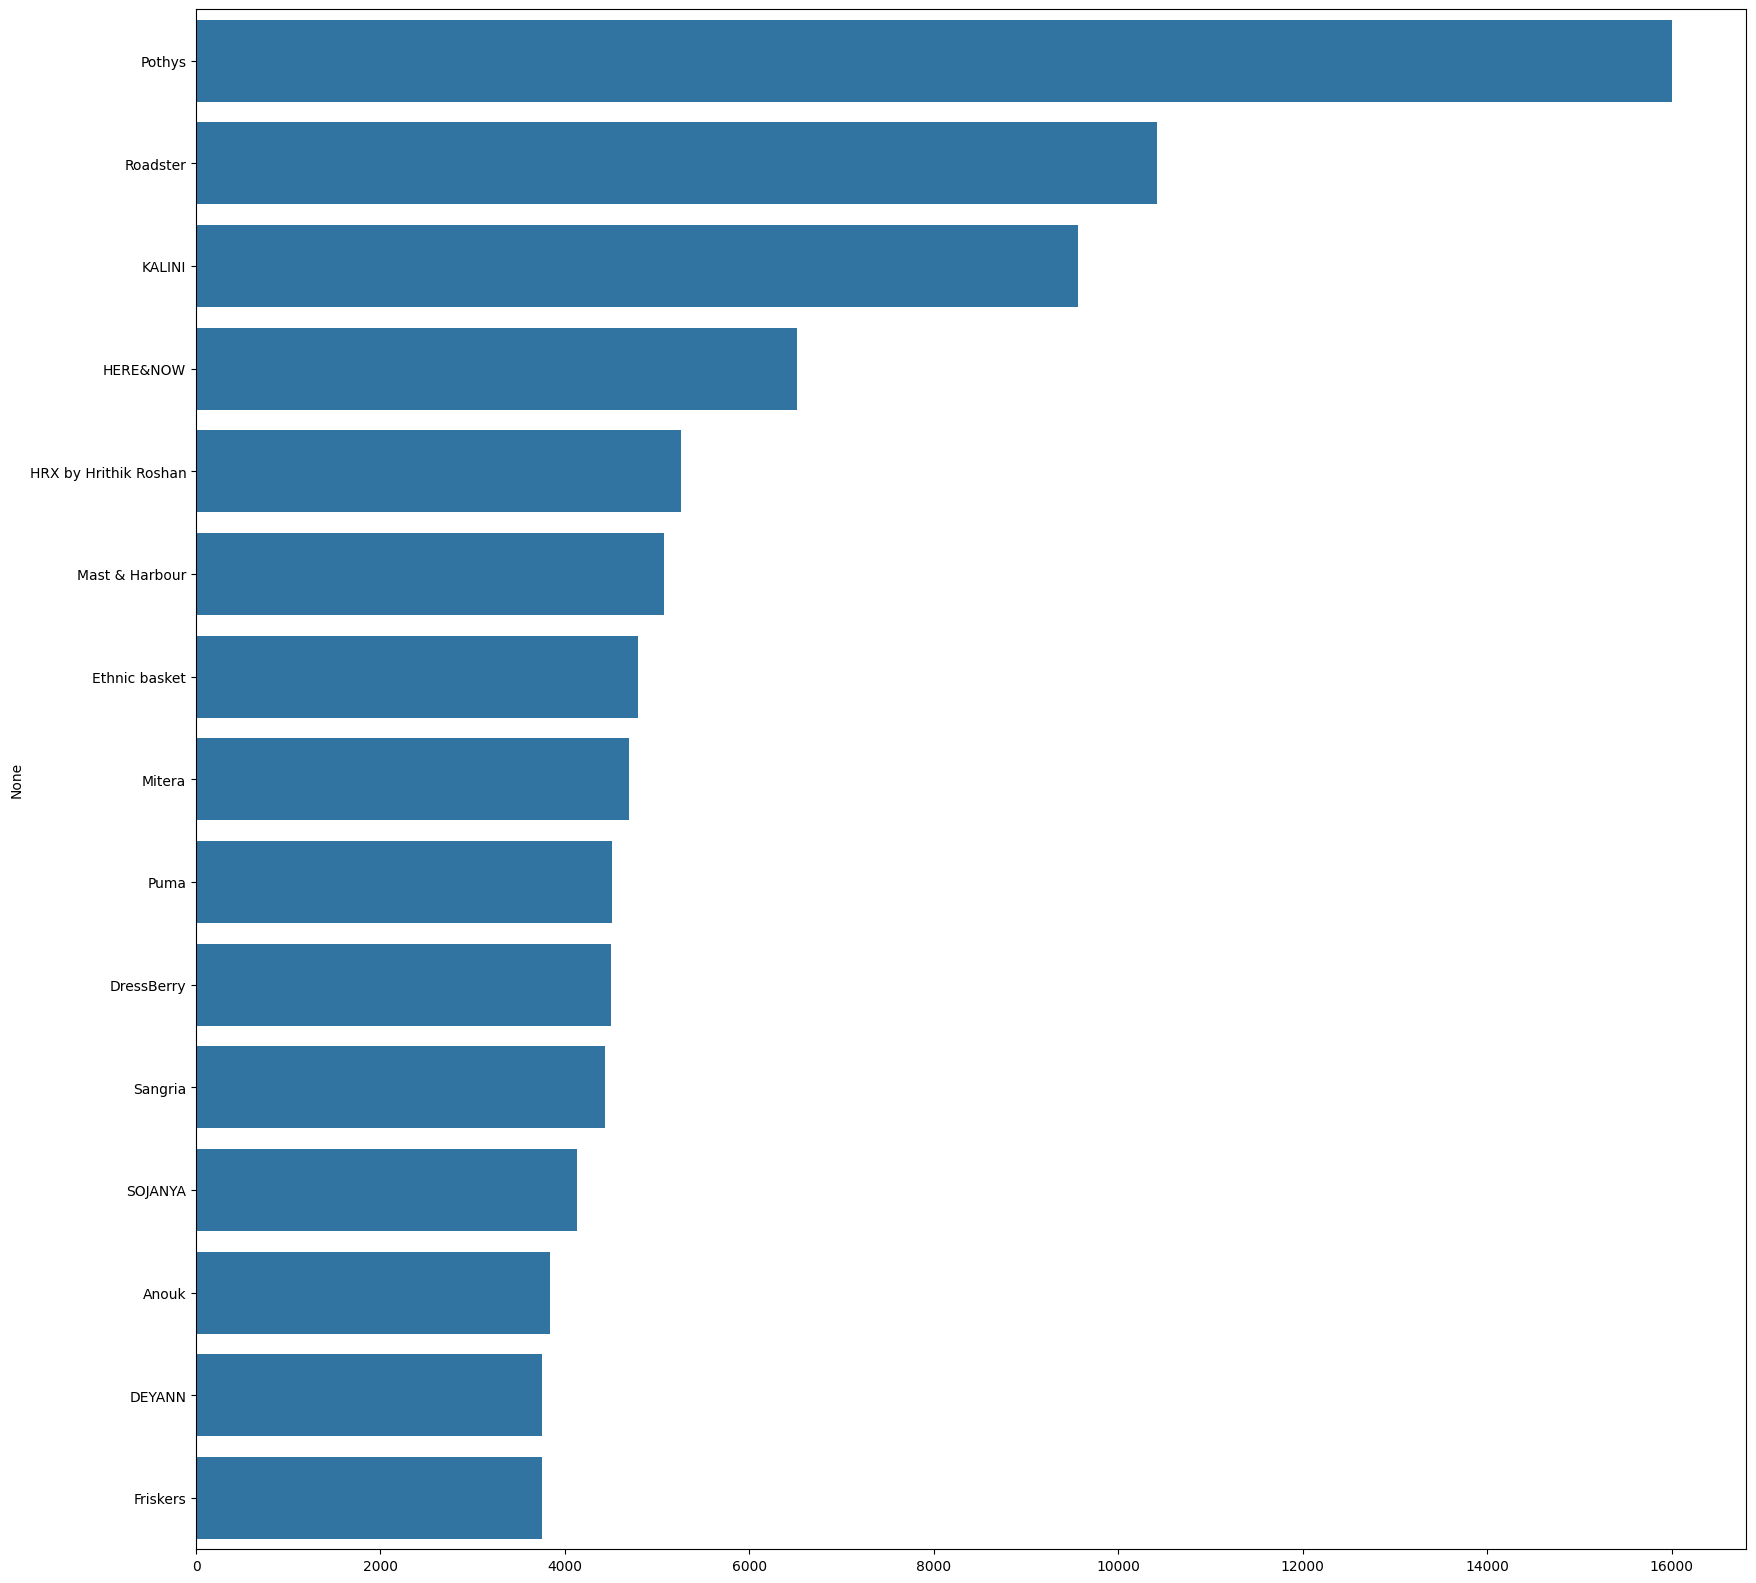

In [ ]:
# Top 15 brands
plt.figure(figsize = (20,20))

sns.barplot(x = df['BrandName'].value_counts().head(15).values, y=df['BrandName'].value_counts().head(15).index)

<Axes: ylabel='None'>

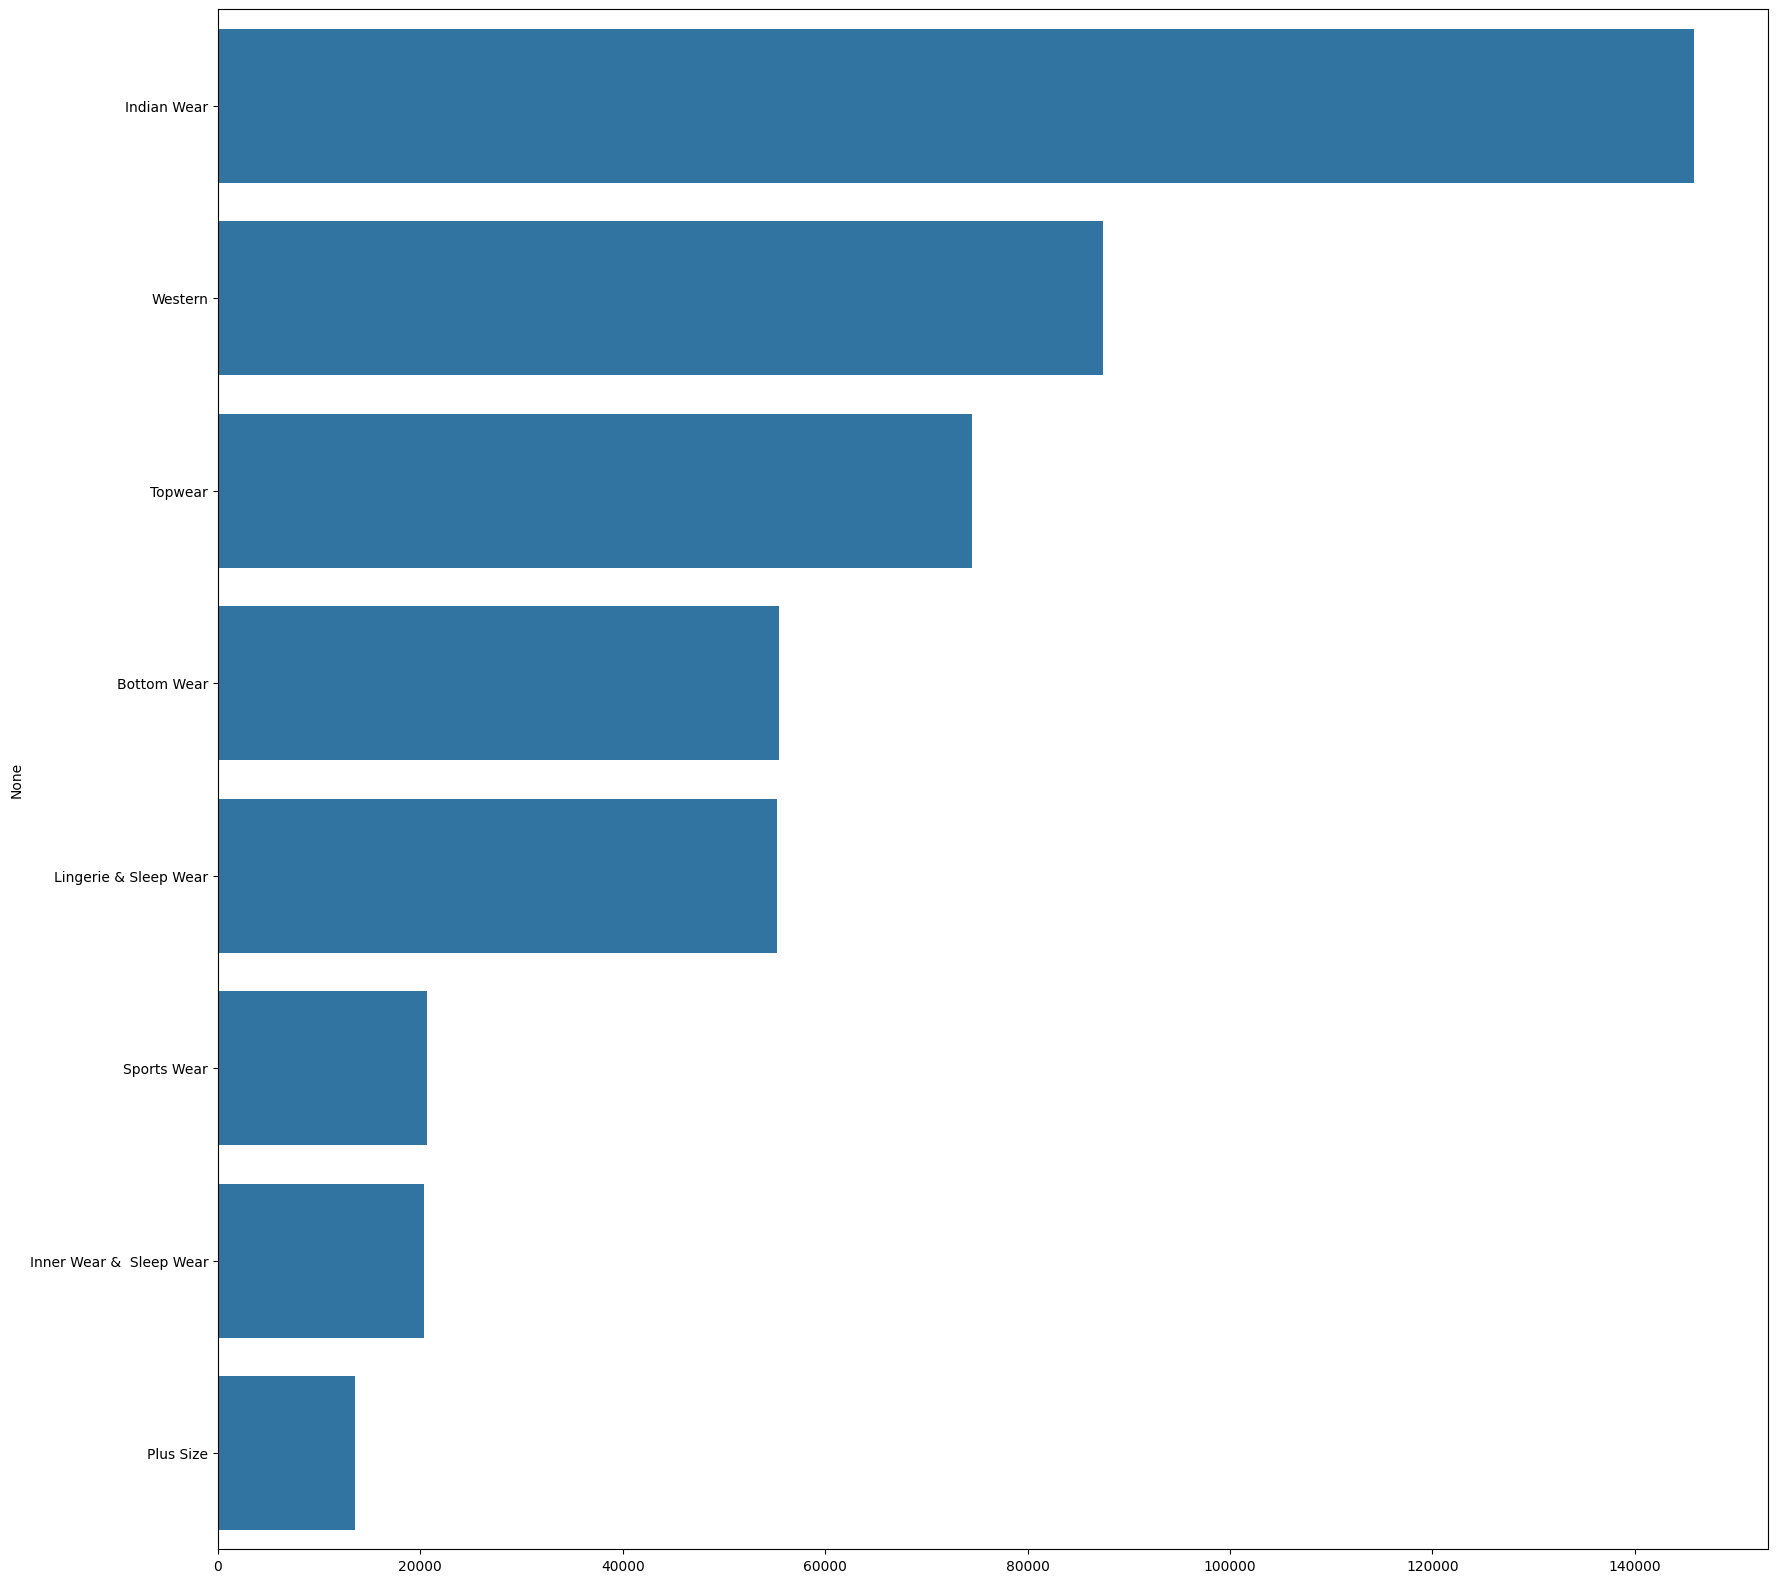

In [ ]:
# TOP categorywise sales
plt.figure(figsize = (20,20))
sns.barplot(x = df['Category'].value_counts().head(8).values, y=df['Category'].value_counts().head(8).index)

<Axes: ylabel='None'>

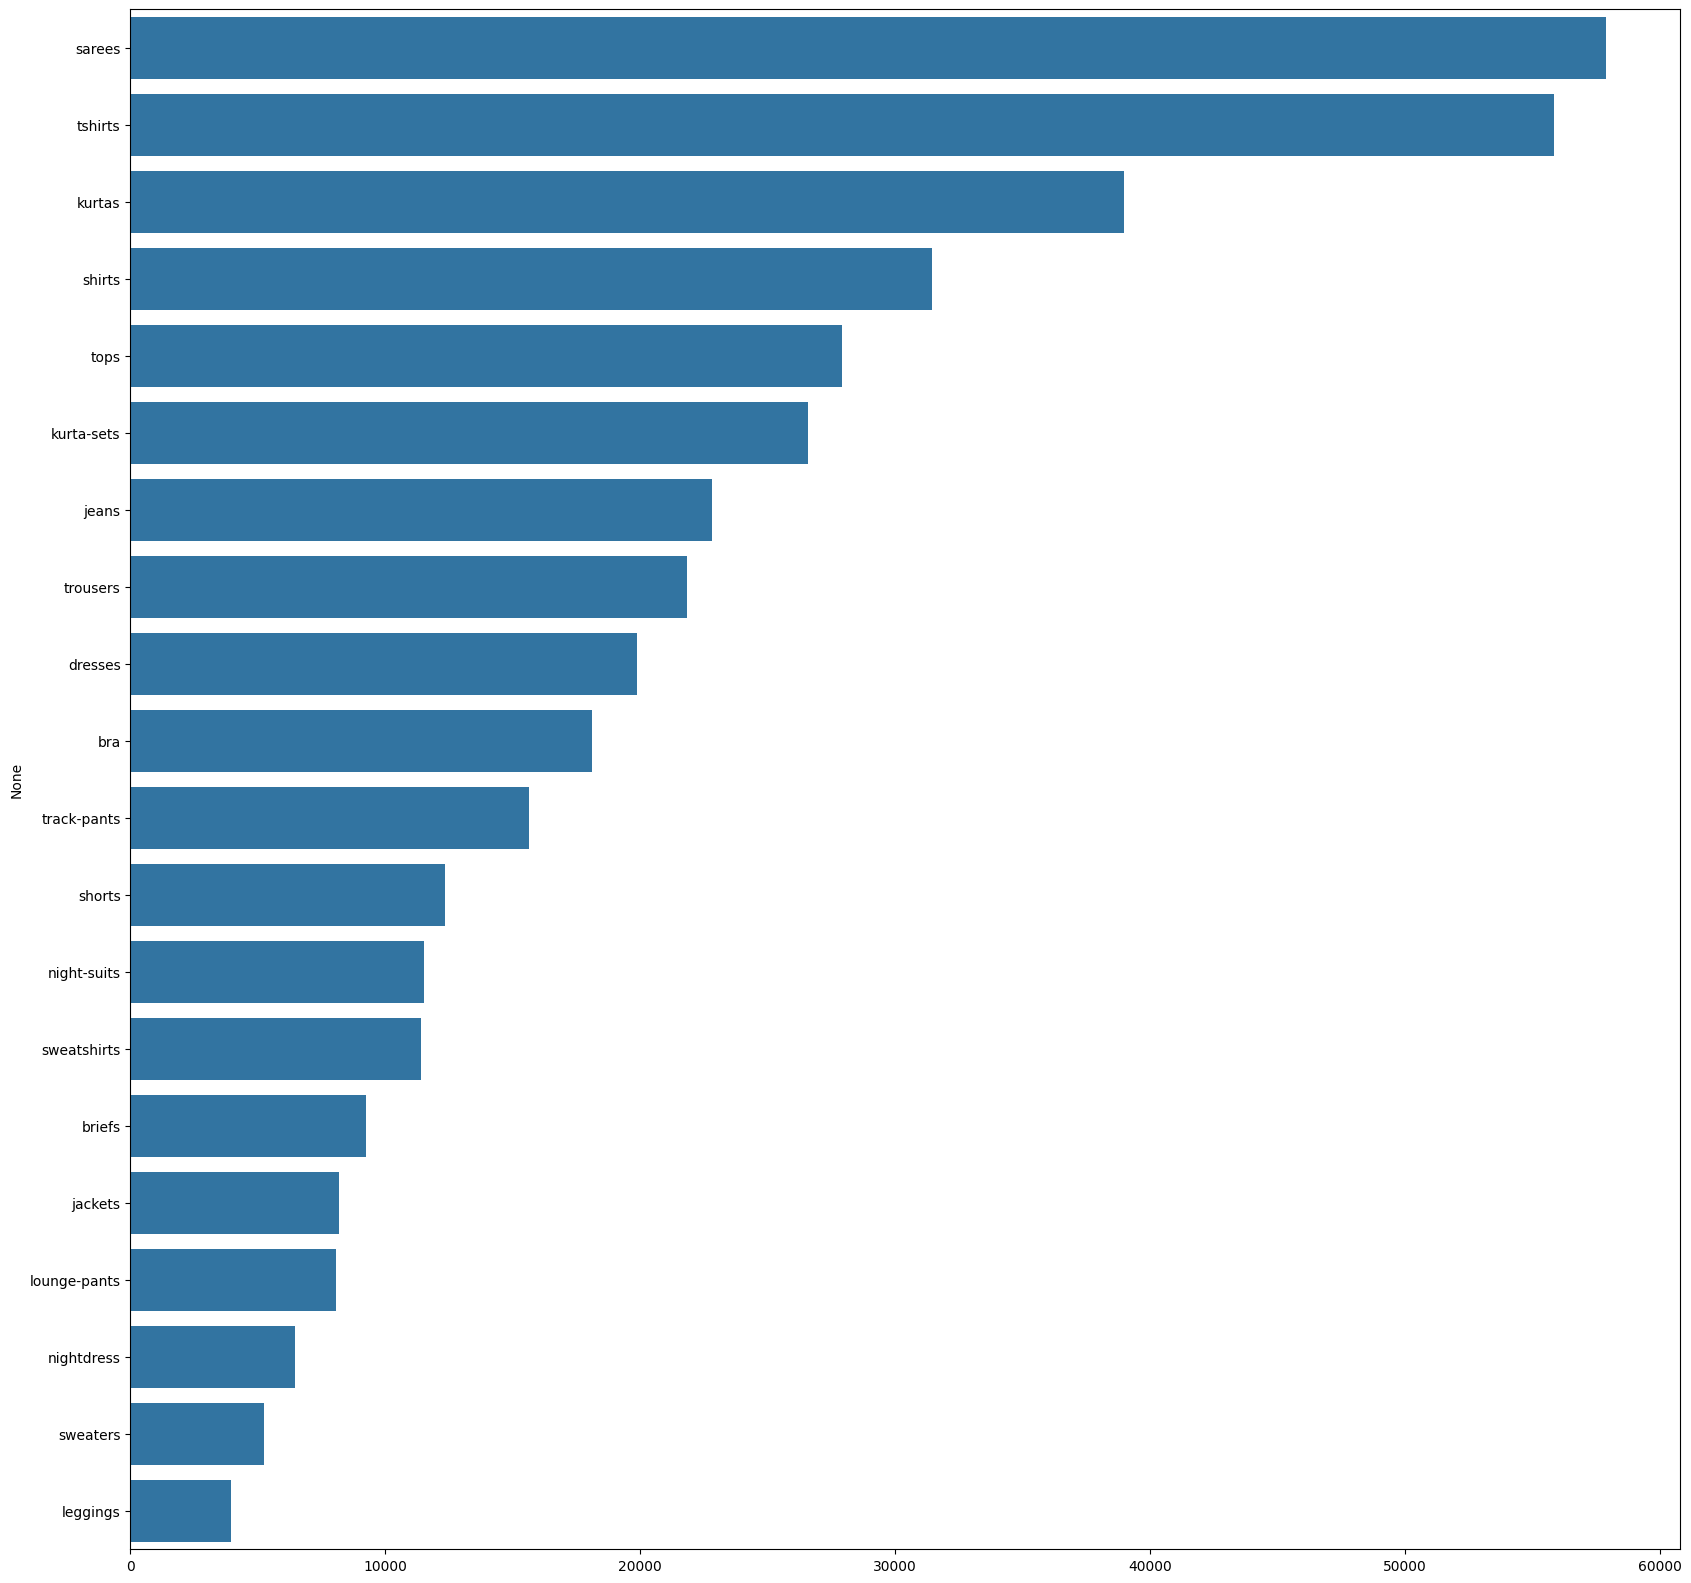

In [ ]:
# TOP 10 INDIVIDUAL CATEGORY
plt.figure(figsize = (20,20))
sns.barplot(x = df['Individual_category'].value_counts().head(20).values, y=df['Individual_category'].value_counts().head(20).index)

**TOP BRAND UNDER 'TSHIRTS' CATEGORY**

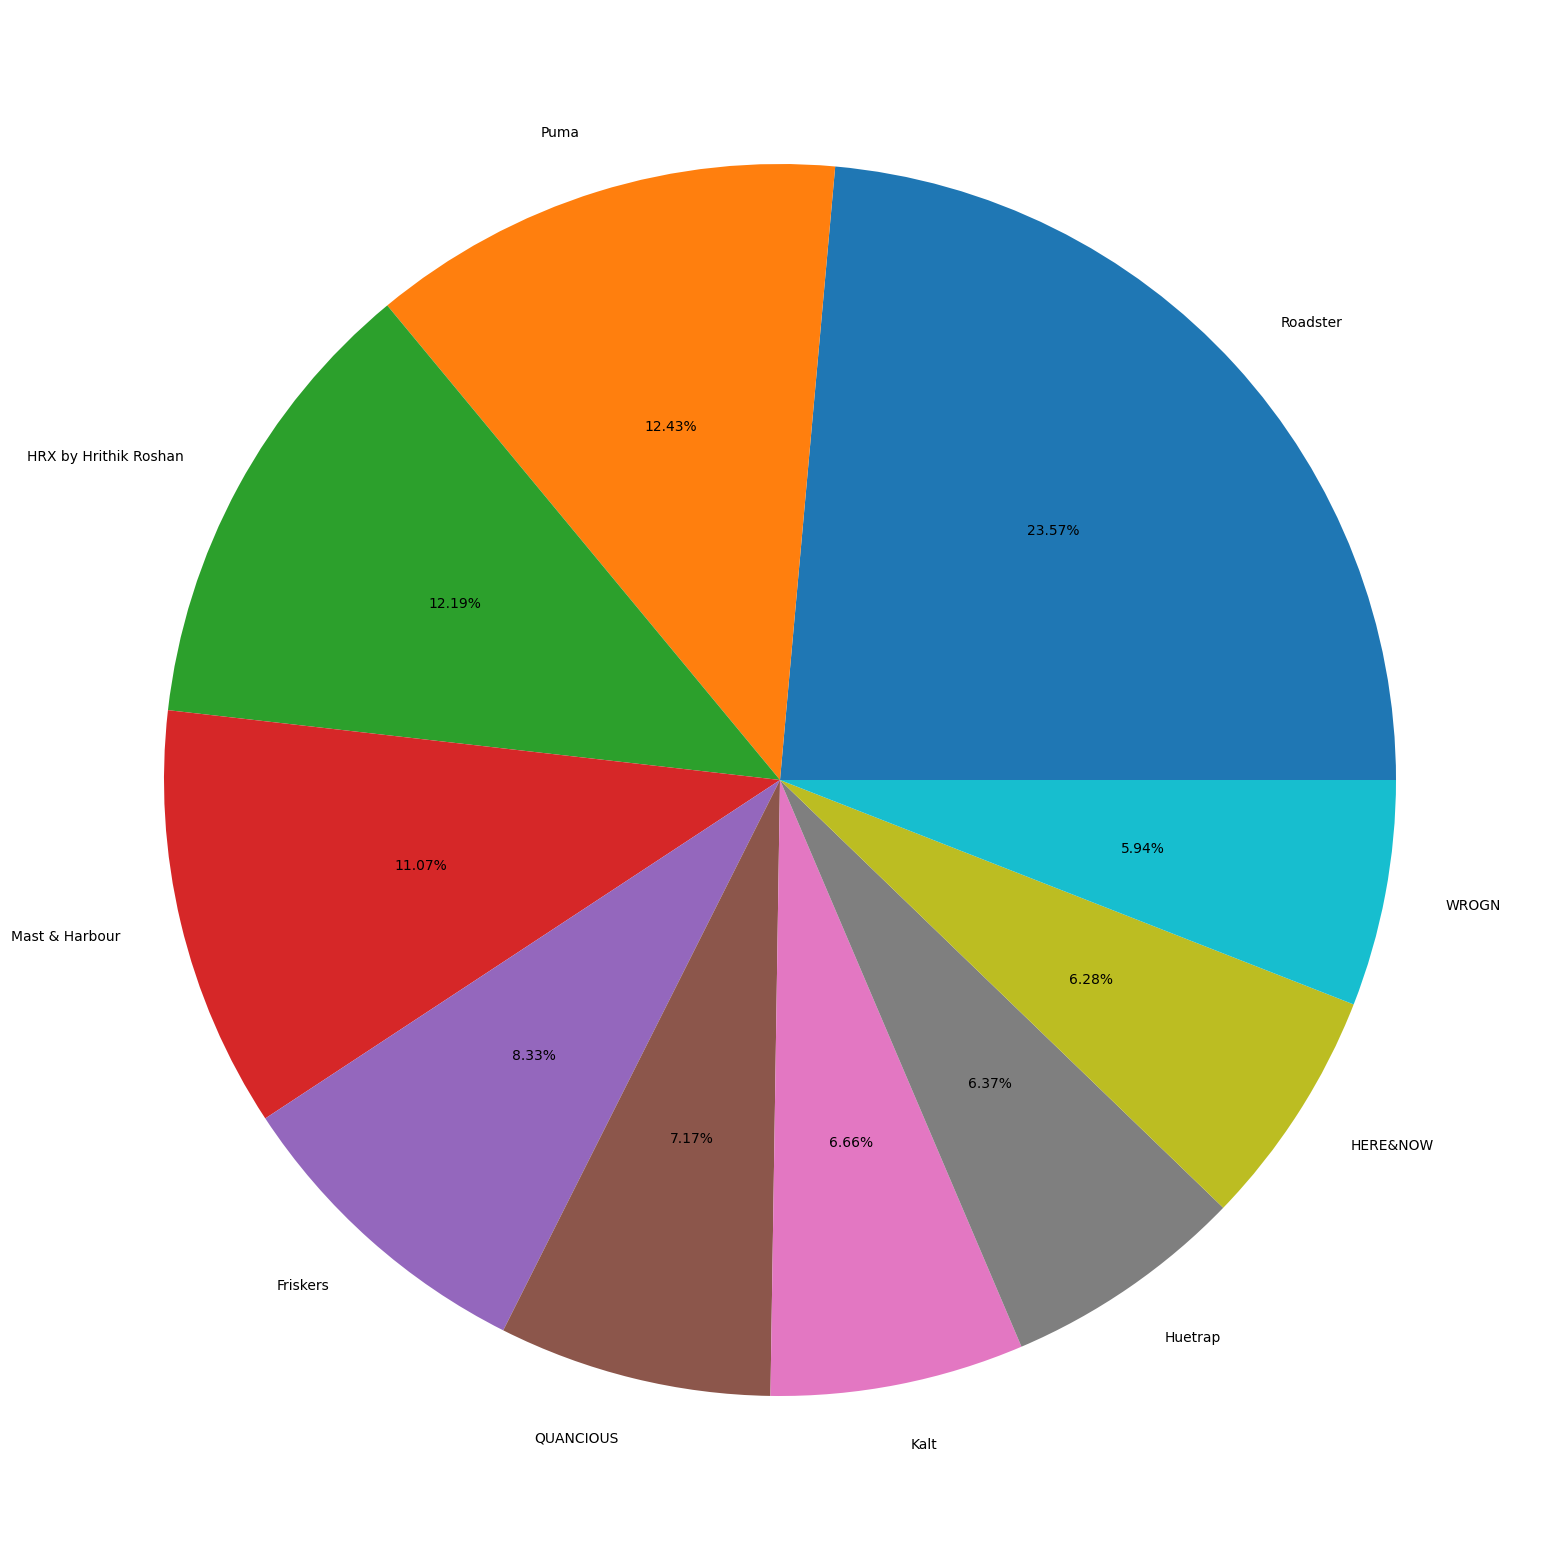

In [ ]:
X = df[df['Individual_category'] == 'tshirts']
t = X['BrandName'].value_counts().head(10).values
r = X['BrandName'].value_counts().head(10).index

plt.figure(figsize = (30,20))
plt.pie(t[:10],labels=r[:10],autopct='%1.2f%%')
plt.show()

**TOP BRAND IN 'TOPS' CATEGORY**

In [ ]:
Z = df[df['Individual_category'] == 'tops']

In [ ]:
df.groupby(['Category']).Individual_category.agg(['count']).reset_index()

,Category,count
0,Bottom Wear,55439
1,Indian Wear,145845
2,Inner Wear & Sleep Wear,20370
3,Lingerie & Sleep Wear,55258
4,Plus Size,13496
5,Sports Wear,20627
6,Topwear,74537
7,Western,87453


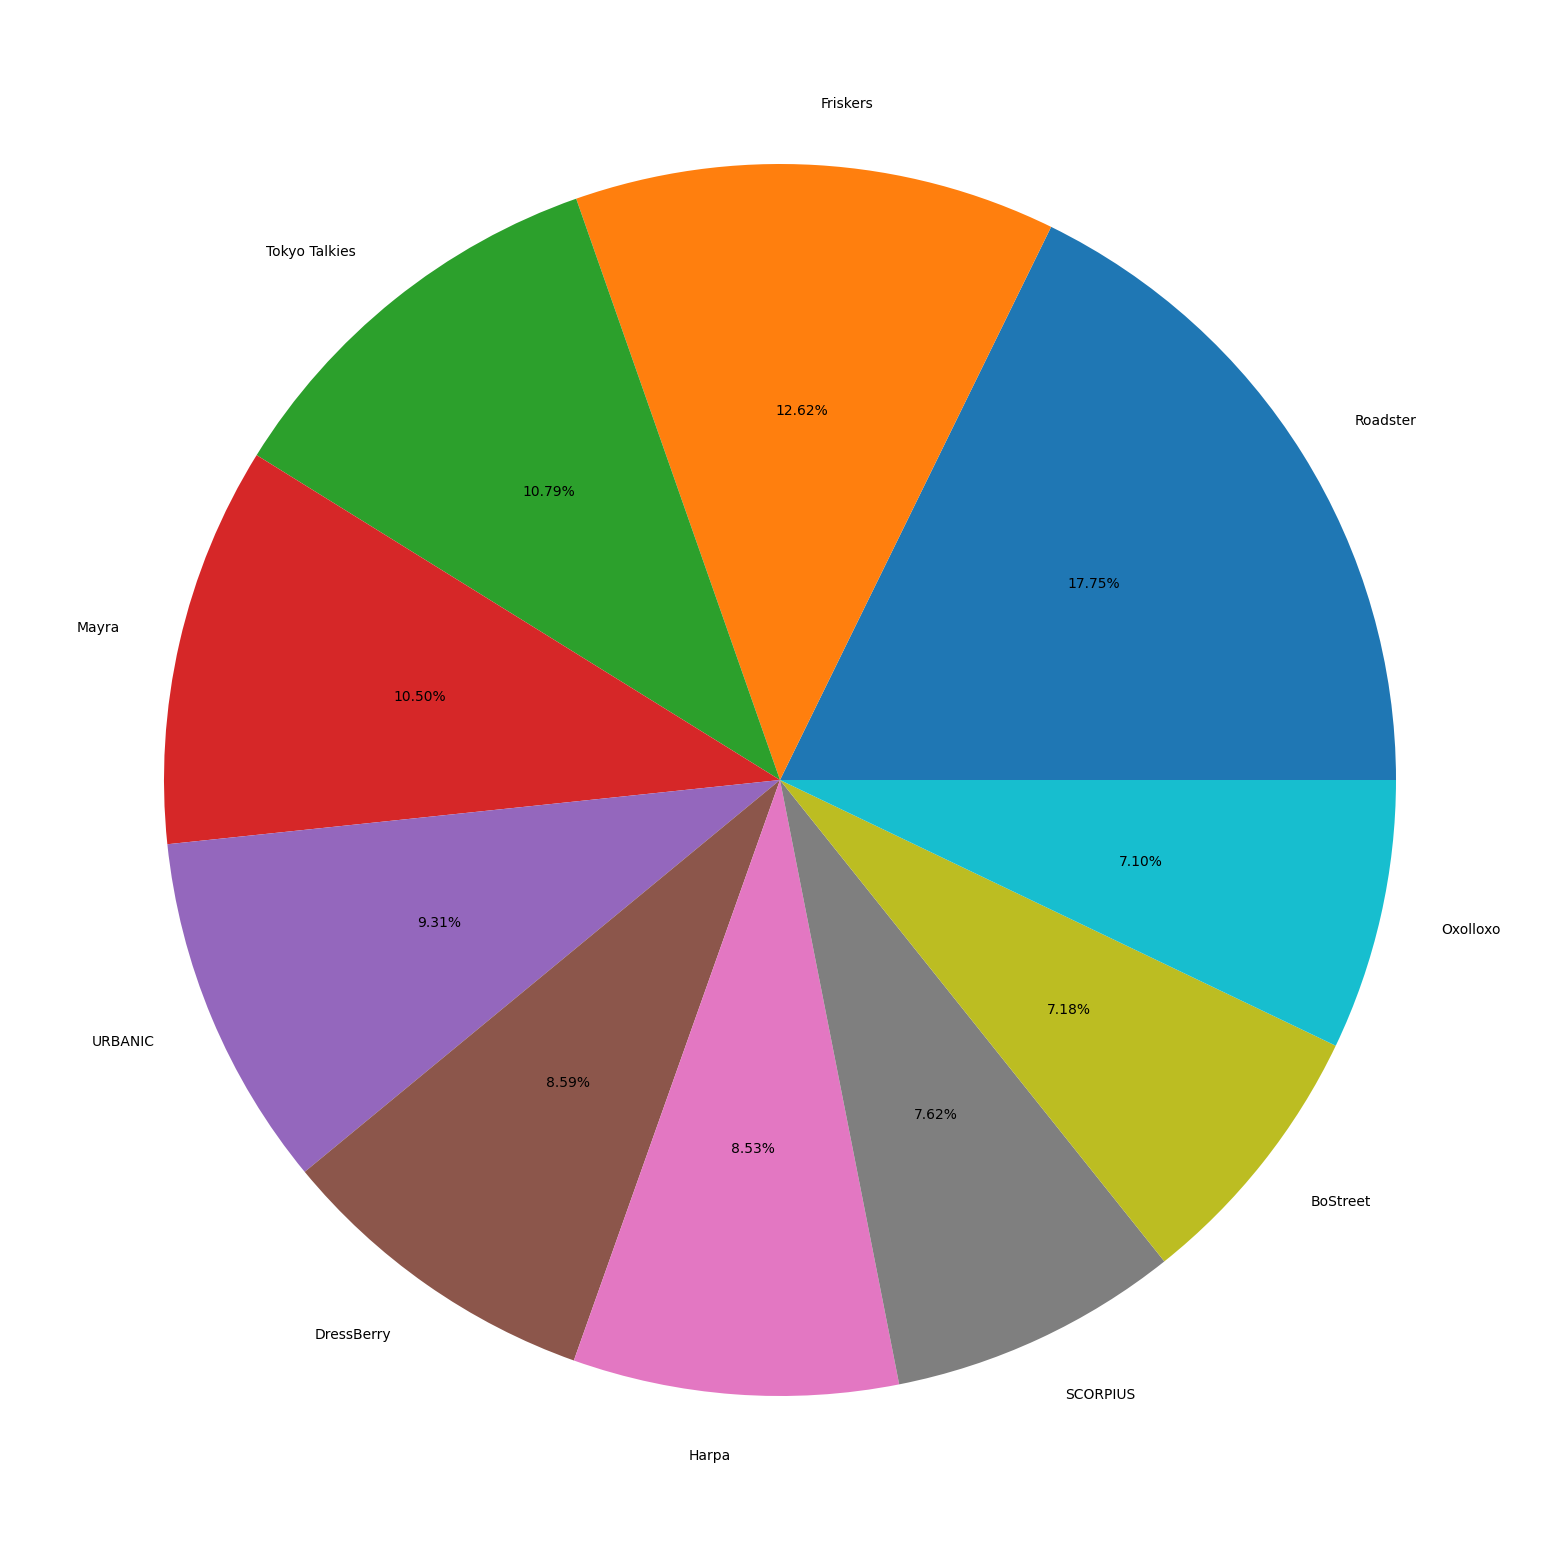

In [ ]:
U  = Z['BrandName'].value_counts().head(10).values
T  = Z['BrandName'].value_counts().head(10).index

plt.figure(figsize = (30,20))
plt.pie(U[:15],labels=T[:15],autopct='%1.2f%%')
plt.show()

**Most selling brand for women**

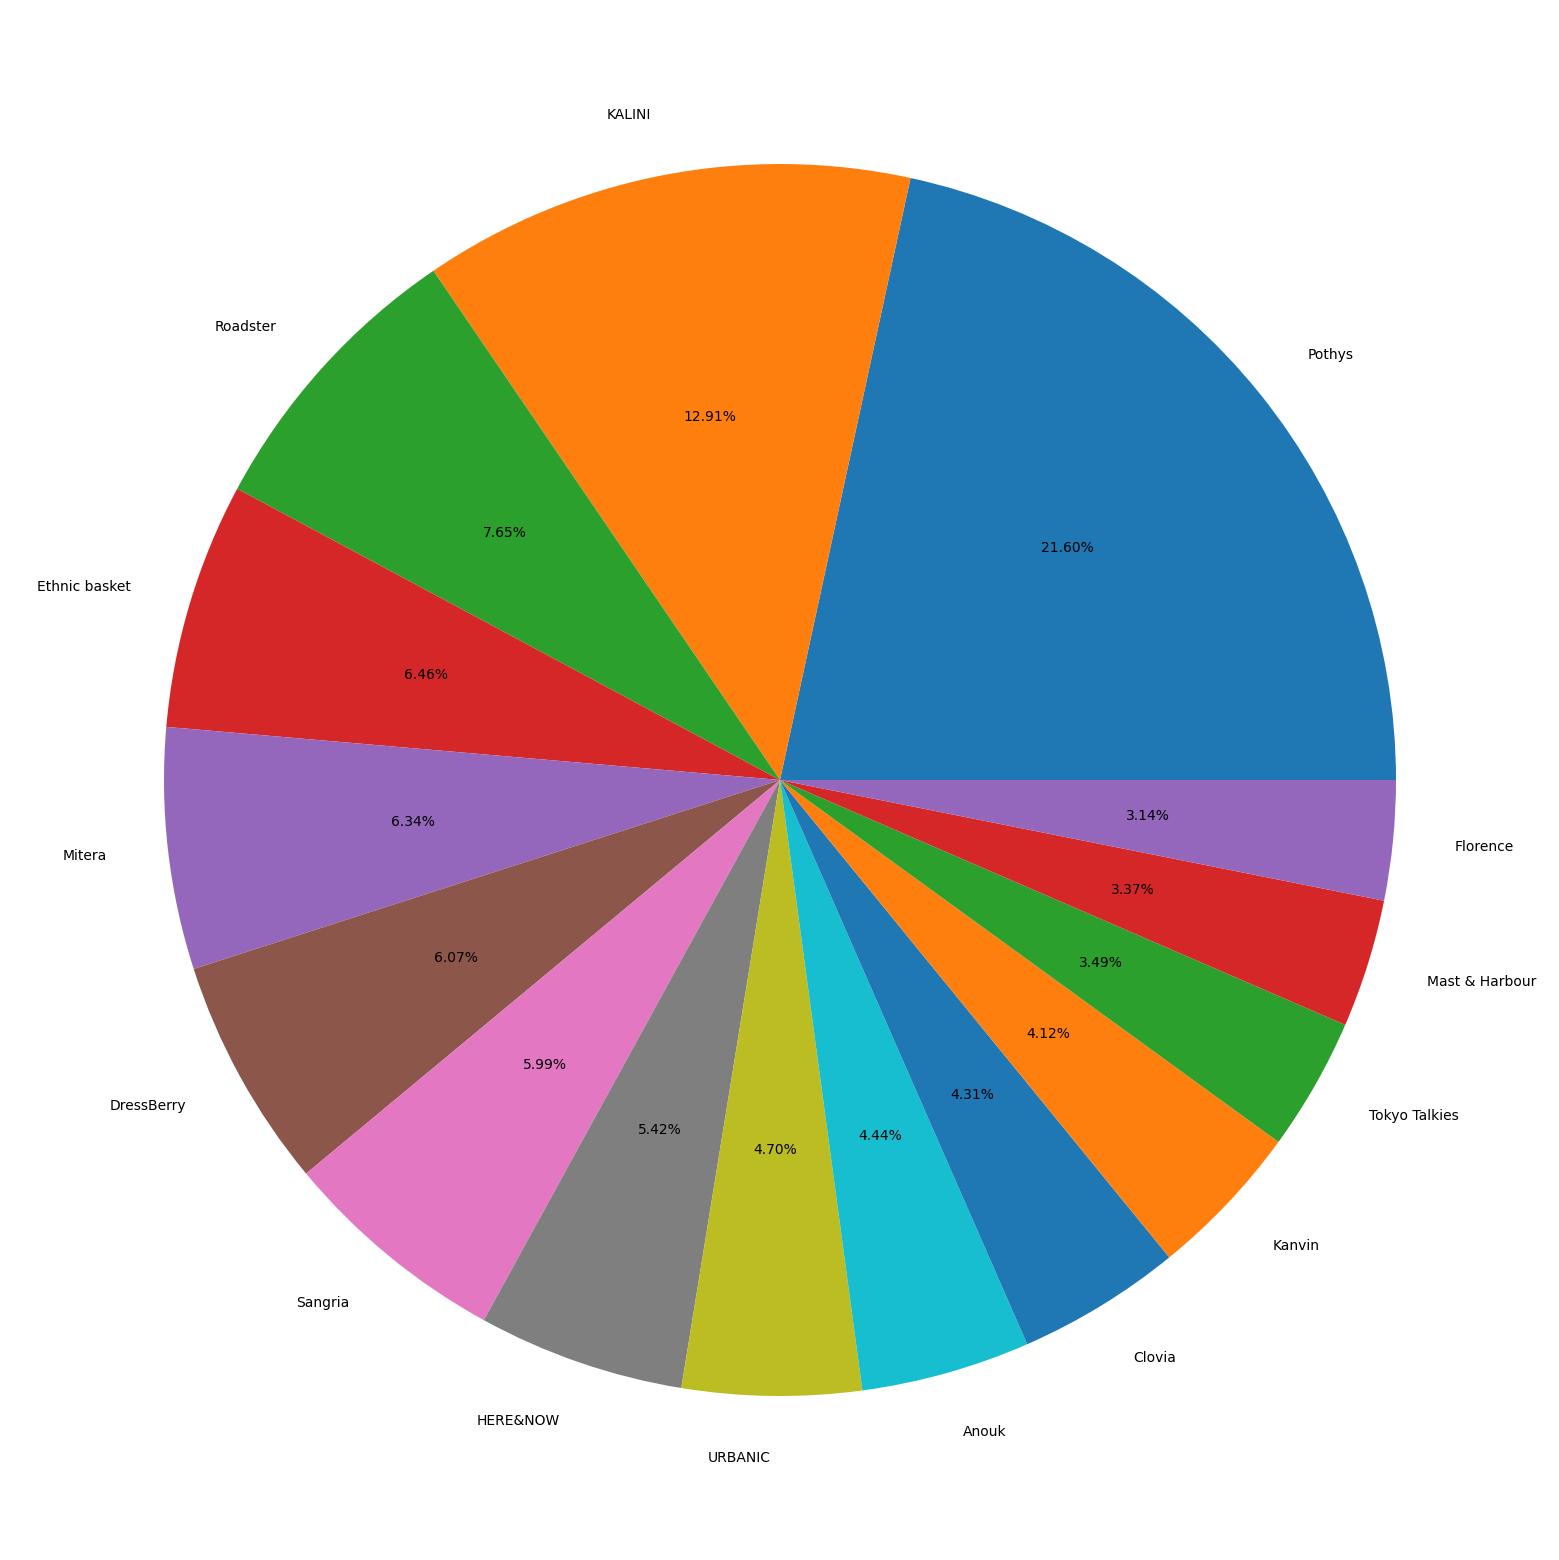

In [ ]:
K = df[df['category_by_Gender'] == 'Women']
D= K['BrandName'].value_counts().values
W = K['BrandName'].value_counts().index

plt.figure(figsize = (30,20))

plt.pie(D[:15],labels=W[:15],autopct='%1.2f%%')
plt.show()

**Most selling brand for men**

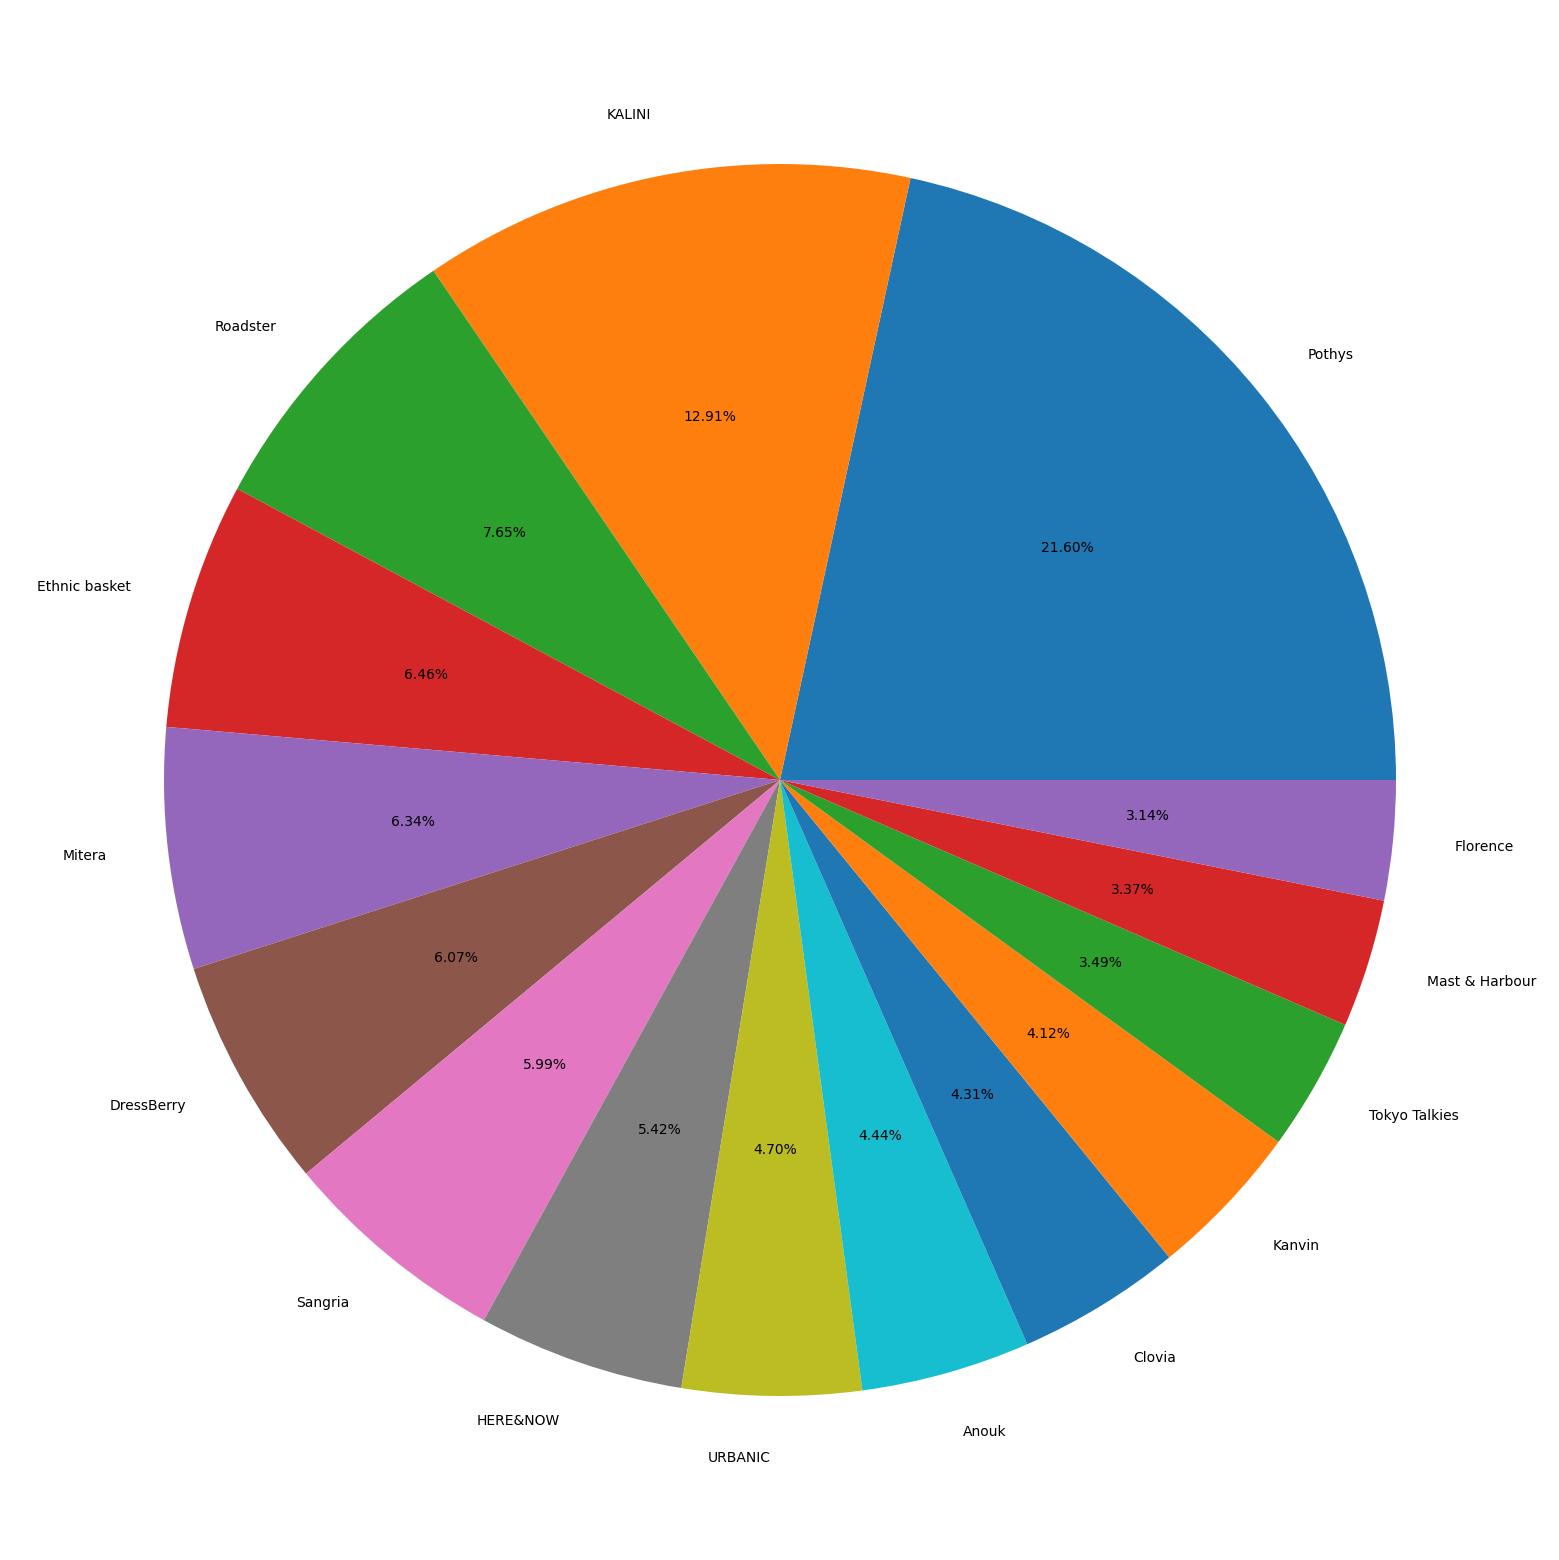

In [ ]:
P = df[df['category_by_Gender'] == 'Men']

S= K['BrandName'].value_counts().values
T = K['BrandName'].value_counts().index
plt.figure(figsize = (30,20))

plt.pie(S[:15],labels=T[:15],autopct='%1.2f%%')
plt.show()